## Importing the libraries

In [93]:
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import Loss
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.metrics import RootMeanSquaredError

## Load and Prepare Data

In [51]:
car = pd.read_csv('CarPrice_Assignment.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [52]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [53]:
car.shape

(205, 26)

## Data Preprocessing and EDA

In [54]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [55]:
car.drop_duplicates()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [56]:
car['CarName'].astype('category').value_counts()

CarName
peugeot 504            6
toyota corona          6
toyota corolla         6
subaru dl              4
mazda 626              3
                      ..
honda civic 1500 gl    1
honda civic 1300       1
honda civic (auto)     1
honda accord lx        1
mazda rx2 coupe        1
Name: count, Length: 147, dtype: int64

In [57]:
def split(x):
   return x.split(' ')[0]

car['Brand'] = car['CarName'].apply(split)
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Brand
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [58]:
car['Brand'] = car['Brand'].apply(lambda y: y.lower())

car.loc[(car['Brand'] == 'vw') | (car['Brand'] == 'vokswagen'),'Brand'] = 'volkswagen'
car.loc[(car['Brand'] == 'toyouta'),'Brand'] = 'toyota'
car.loc[(car['Brand'] == 'maxda'),'Brand'] = 'mazda'
car.loc[(car['Brand'] == 'porcshce'),'Brand'] = 'porsche'

In [59]:
numeric = car.select_dtypes(include=['int64','float64'])

In [60]:
car['doornumber'] = car['doornumber'].map({'two':2,'four':4})
car['cylindernumber'] = car['cylindernumber'].map({'four':4,'six':6,'five':5,'eight':8,'two':2,'twelve':12,'three':3})


In [61]:
car['cylindernumber'].astype('category').value_counts()

cylindernumber
4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: count, dtype: int64

In [62]:
categorical = car.select_dtypes(include=['object'])
categorical.head()

,CarName,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,Brand
0,alfa-romero giulia,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,alfa-romero stelvio,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,alfa-romero Quadrifoglio,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,audi 100 ls,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,audi 100ls,gas,std,sedan,4wd,front,ohc,mpfi,audi


In [63]:
dummies = pd.get_dummies(categorical,drop_first=True)
dummies.head()

,CarName_alfa-romero Quadrifoglio,CarName_alfa-romero giulia,CarName_alfa-romero stelvio,CarName_audi 100 ls,CarName_audi 100ls,CarName_audi 4000,CarName_audi 5000,CarName_audi 5000s (diesel),CarName_audi fox,CarName_bmw 320i,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
car = pd.concat([car,dummies],axis=1)

car.drop(columns=categorical.columns,axis=1,inplace=True)

In [65]:
car.head()

,car_ID,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,...,Brand_nissan,Brand_peugeot,Brand_plymouth,Brand_porsche,Brand_renault,Brand_saab,Brand_subaru,Brand_toyota,Brand_volkswagen,Brand_volvo
0,1,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,False,False,False,False,False,False,False,False,False,False
1,2,3,2,88.6,168.8,64.1,48.8,2548,4,130,...,False,False,False,False,False,False,False,False,False,False
2,3,1,2,94.5,171.2,65.5,52.4,2823,6,152,...,False,False,False,False,False,False,False,False,False,False
3,4,2,4,99.8,176.6,66.2,54.3,2337,4,109,...,False,False,False,False,False,False,False,False,False,False
4,5,2,4,99.4,176.6,66.4,54.3,2824,5,136,...,False,False,False,False,False,False,False,False,False,False


In [66]:
car.shape

(205, 207)

## Strorytelling - Visualization

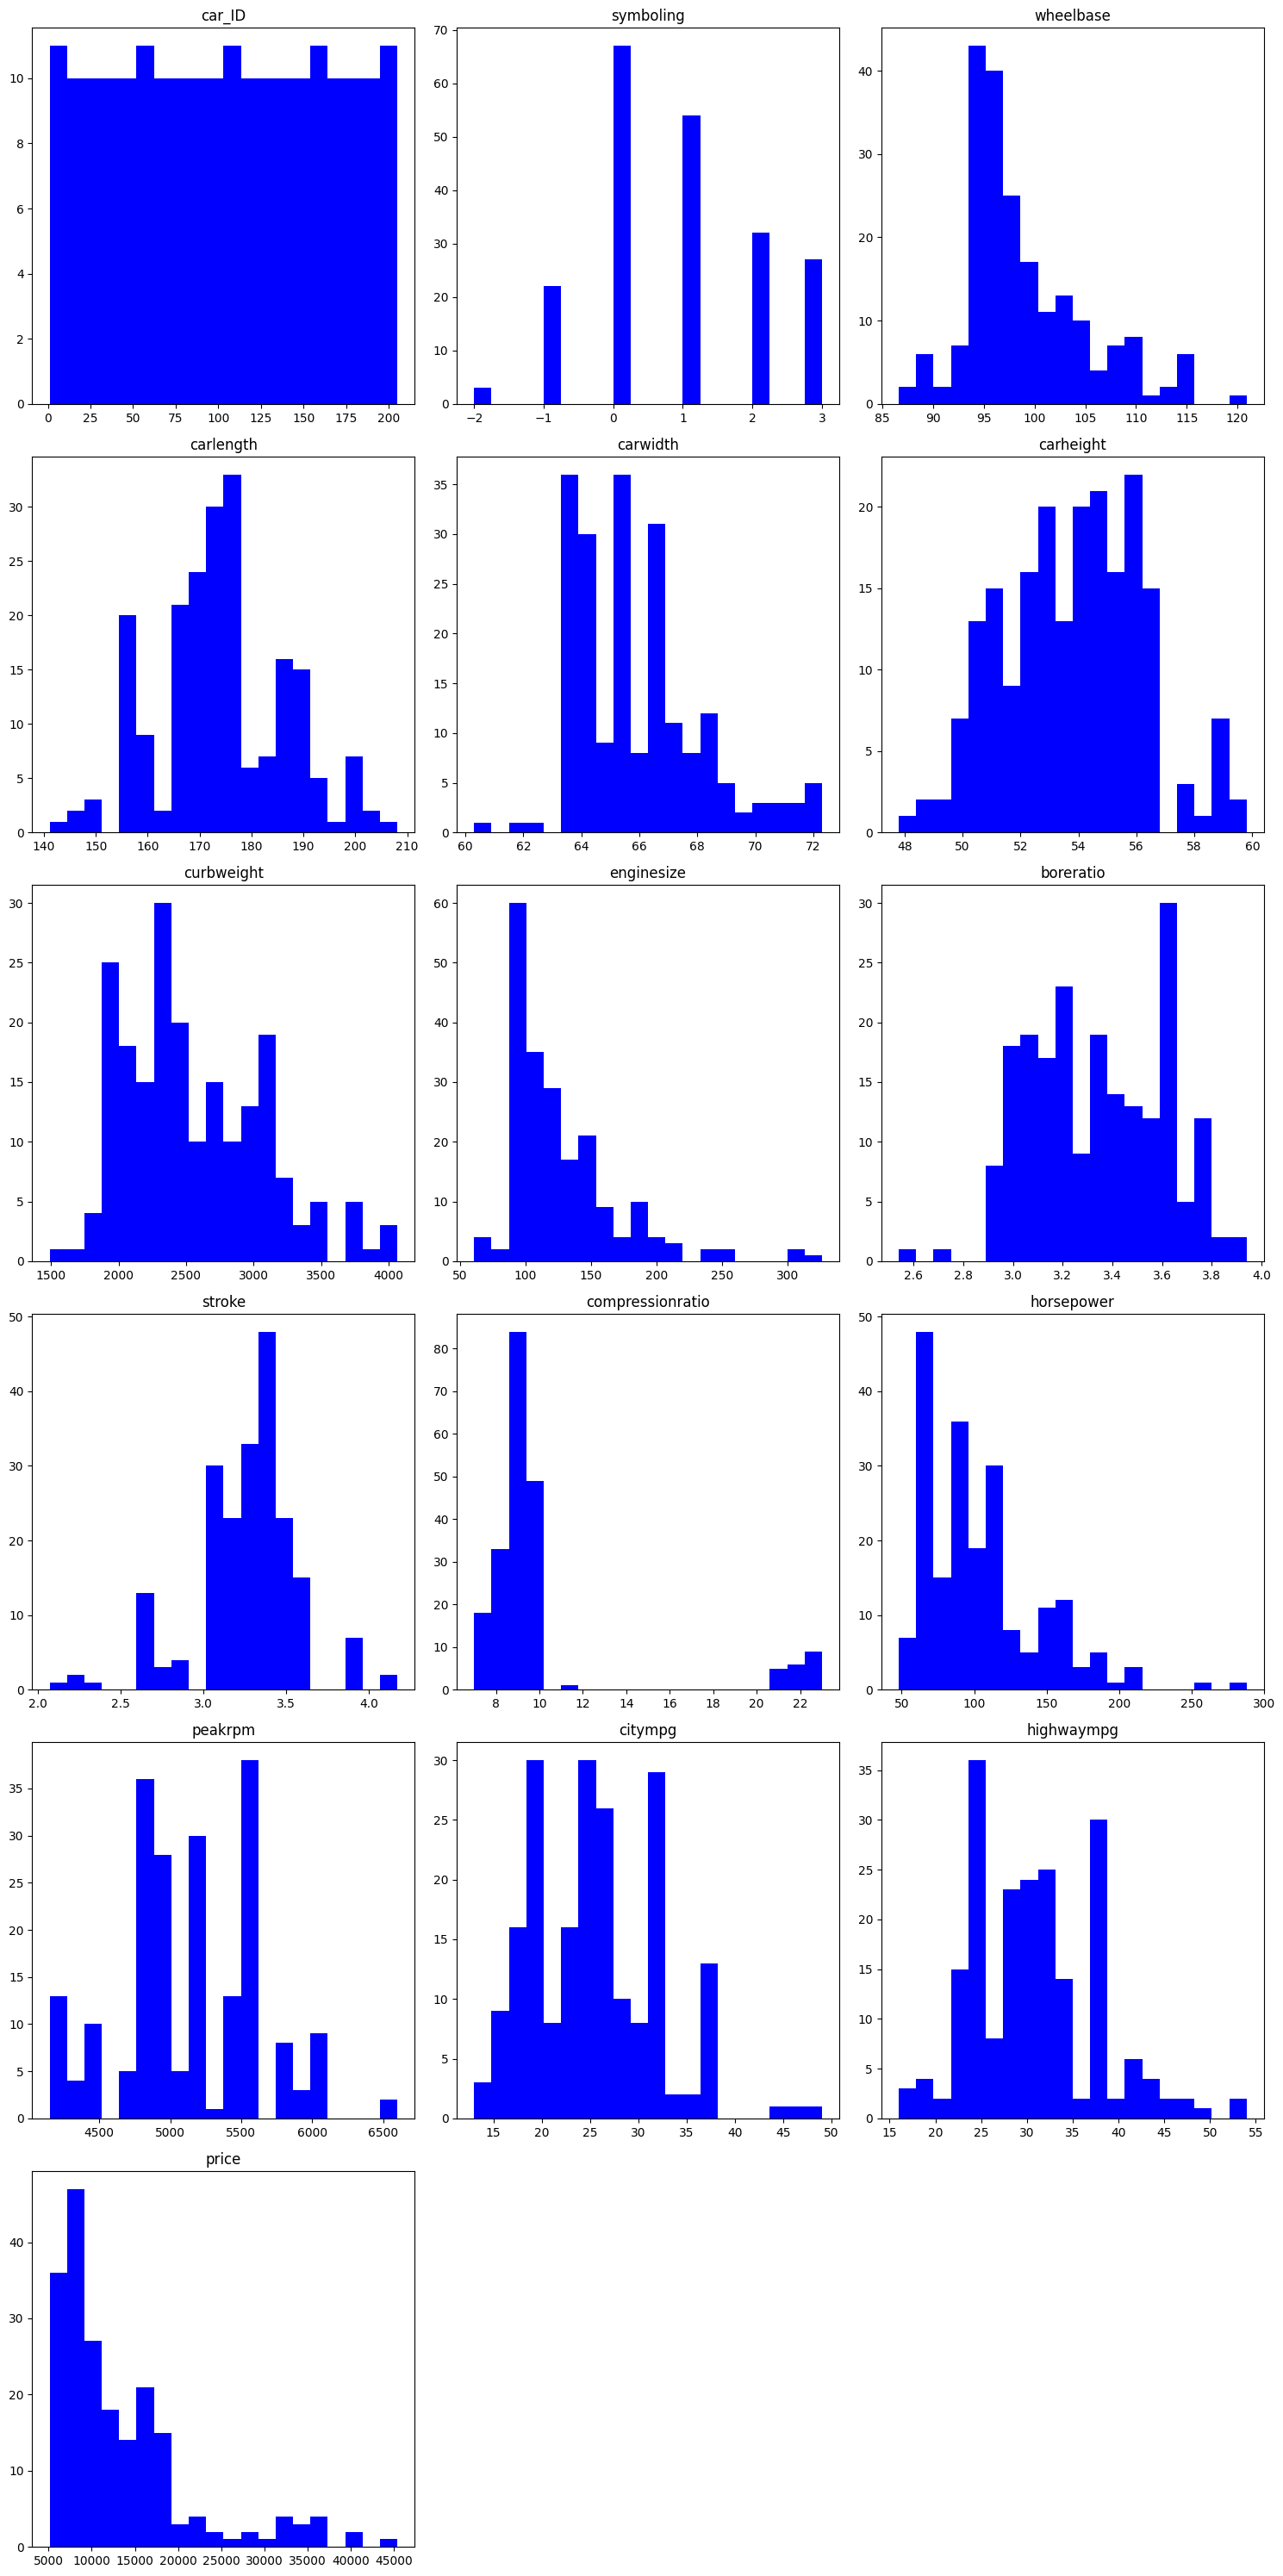

In [67]:
num_cols = len(numeric.columns)


num_rows = (num_cols + 2) // 3
plt.figure(figsize=(15, 5 * num_rows))

for i in range(num_cols):
    plt.subplot(num_rows, 3, i+1)
    plt.hist(numeric.iloc[:, i], bins=20, color='blue')
    plt.title(numeric.columns[i])

plt.tight_layout()
plt.show()


## Prepare Data 

In [89]:
X = car.drop('price', axis=1)
y = car['price']
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=42)

## Train your model

In [90]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [91]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

In [94]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', RootMeanSquaredError()])

In [95]:
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
5/5 [==============================] - 3s 122ms/step - loss: 245306224.0000 - mae: 13531.1523 - root_mean_squared_error: 15662.2549 - val_loss: 173683168.0000 - val_mae: 11553.9990 - val_root_mean_squared_error: 13178.8906
Epoch 2/100
5/5 [==============================] - 0s 40ms/step - loss: 245260464.0000 - mae: 13529.6504 - root_mean_squared_error: 15660.7939 - val_loss: 173656400.0000 - val_mae: 11553.0186 - val_root_mean_squared_error: 13177.8750
Epoch 3/100
5/5 [==============================] - 0s 48ms/step - loss: 245210736.0000 - mae: 13528.0879 - root_mean_squared_error: 15659.2061 - val_loss: 173626576.0000 - val_mae: 11551.9434 - val_root_mean_squared_error: 13176.7441
Epoch 4/100
5/5 [==============================] - 0s 33ms/step - loss: 245154304.0000 - mae: 13526.3291 - root_mean_squared_error: 15657.4043 - val_loss: 173591248.0000 - val_mae: 11550.6875 - val_root_mean_squared_error: 13175.4033
Epoch 5/100
5/5 [==============================] - 0s 38ms/step

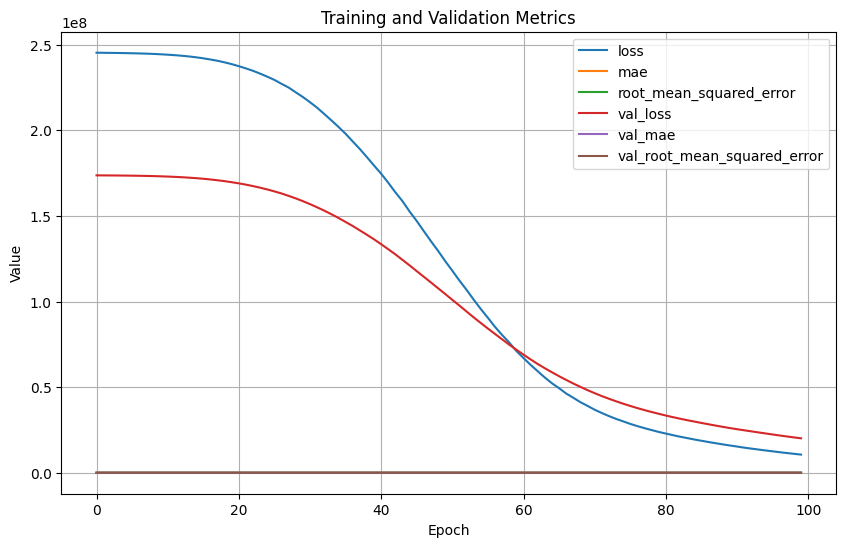

In [96]:
history_df = pd.DataFrame(history.history)
history_df.plot(figsize=(10, 6))
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.title('Training and Validation Metrics')
plt.grid(True)
plt.show()

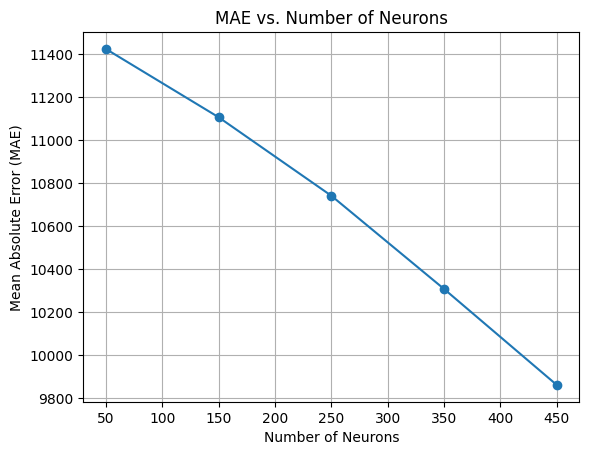

In [114]:
neurons_range = np.arange(50, 501, 100)

mae_values_neurons = []

for n_neurons in neurons_range:
    model = Sequential([
        Dense(n_neurons, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae', RootMeanSquaredError()])

    history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)
    val_loss, val_mae, val_rmse = model.evaluate(X_val_scaled, y_val, verbose=0)

    mae_values_neurons.append(val_mae)

plt.plot(neurons_range, mae_values_neurons, marker='o')
plt.xlabel('Number of Neurons')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Neurons')
plt.grid(True)
plt.show()


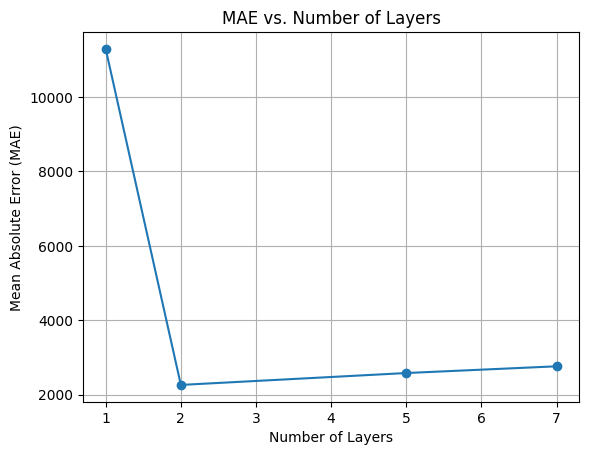

In [115]:
mae_values_layers = []

layers_list = [1, 2, 5, 7]

for n_layers in layers_list:

    model = Sequential()
    model.add(Dense(100, activation='relu', input_shape=(X_train_scaled.shape[1],)))
    for _ in range(n_layers - 1):
        model.add(Dense(100, activation='relu'))
    model.add(Dense(1))


    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae', RootMeanSquaredError()])


    history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)


    val_loss, val_mae, val_rmse = model.evaluate(X_val_scaled, y_val, verbose=0)


    mae_values_layers.append(val_mae)
plt.plot(layers_list, mae_values_layers, marker='o')
plt.xlabel('Number of Layers')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE vs. Number of Layers')
plt.grid(True)
plt.show()


In [116]:
model_deep = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

model_deep.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae', RootMeanSquaredError()])

history_deep = model_deep.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)

val_loss_deep, val_mae_deep, val_rmse_deep = model_deep.evaluate(X_val_scaled, y_val, verbose=0)

print("Deep Model:")
print("Validation MAE:", val_mae_deep)

Deep Model:
Validation MAE: 2320.25341796875


In [117]:
model_wide_deep = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(512, activation='relu'),
    Dense(1)
])

model_wide_deep.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mae', RootMeanSquaredError()])

history_wide_deep = model_wide_deep.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=32, verbose=0)

val_loss_wide_deep, val_mae_wide_deep, val_rmse_wide_deep = model_wide_deep.evaluate(X_val_scaled, y_val, verbose=0)

print("\nWide and Deep Model:")
print("Validation MAE:", val_mae_wide_deep)


Wide and Deep Model:
Validation MAE: 1944.641845703125
